In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("sampled_data.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0


Target 변수: **Class**
* 1: fraudulent transactions(사기)
* 0: otherwise

In [4]:
data['Class'].value_counts()

0    28428
1       52
Name: Class, dtype: int64

### 1-1) Logistic Regression 모형 적합

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class',axis=1), data['Class'], random_state = 0)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21360, 30), (7120, 30), (21360,), (7120,))

In [8]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\LG\venv\jbeen\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
# class 예측
y_pred = classifier.predict(X_test) 

### 1-2) mean accuracy

In [11]:
classifier.score(X_test, y_test)

0.998876404494382

### 2) confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[   4,    5],
       [   3, 7108]], dtype=int64)

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(7108, 3, 5, 4)

* TP (실제=1, 예측=1): 4
* FN (실제=1, 예측=0): 5
* FP (실제=0, 예측=1): 3
* TN (실제=0, 예측=0): 7108

<br>


데이터를 보았을 때 사기인 경우(Y=1) 보다 사기가 아닌 경우(Y=0)가 훨씬 많다. 

분류 모형을 학습시키면 Y=0일 때를 더 많이 학습하게 되므로 실제 데이터와 무관하게 Y=0이라고 예측할 확률이 커진다. 따라서 TN의 값이 매우 높지만, TP 값이 작은 것을 알 수 있다. 

accuracy는 TN, TP 값을 한꺼번에 고려하므로 TN은 높지만 TP값이 낮은 경우는 고려하지 못하게 된다. 

In [14]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy: ", accuracy)

accuracy:  0.998876404494382


confusion matrix의 accuracy 값과 mean accuracy 값은 동일하다.

#### +) 추가 성능 지표 

In [15]:
precision = tp / (fp+tp)
recall = tp / (fn+tp)
specificity = tn / (fp+tn)
f1_score = 2*(precision*recall)/(precision+recall)

In [16]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.5714285714285714
recall:  0.4444444444444444
specificity:  0.9995781184081002
f1_score:  0.5


### 3-1) cut-off 찾아보기

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40627197e-04,
        1.40627197e-04, 4.21881592e-04, 4.21881592e-04, 7.03135986e-04,
        7.03135986e-04, 1.54689917e-03, 1.54689917e-03, 2.95317114e-03,
        2.95317114e-03, 8.85951343e-03, 8.85951343e-03, 2.77035579e-02,
        2.77035579e-02, 3.54802419e-01, 3.55083673e-01, 1.00000000e+00]),
 array([0.        , 0.11111111, 0.22222222, 0.22222222, 0.33333333,
        0.33333333, 0.44444444, 0.44444444, 0.55555556, 0.55555556,
        0.66666667, 0.66666667, 0.77777778, 0.77777778, 0.88888889,
        0.88888889, 1.        , 1.        , 1.        , 1.        ]),
 array([1.99999996e+00, 9.99999963e-01, 9.99974298e-01, 9.98710116e-01,
        9.61484092e-01, 6.37716172e-01, 5.48057346e-01, 3.67690583e-01,
        3.61158414e-01, 1.36473522e-01, 1.33954820e-01, 8.67450041e-02,
        7.93642323e-02, 3.25720002e-02, 3.22286888e-02, 1.35002866e-02,
        1.33769315e-02, 5.96639342e-04, 5.96325973e-04, 5.44849766e-12]))

* 인수
    * 타겟 y 벡터, 판별함수 벡터 
    
    
* 결과
    * 변화되는 기준값 (thresholds)
    * 그 기준값을 사용했을 때의 재현율 (tpr = sensitivity) 
      - 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율 (Y(Actual)=1 | Y(Predicted)=1)
      - true positive rate, 높을수록 좋은 모형 
    * 위양성률 (fpr = fall-out = 1-specificity)
      - 실제로는 정상 거래인데, 사기 거래라고 예측한 거래의 비율 (Y(Predicted)=1 | Y(Actual) = 0)
      - false positive rate, 낮을수록 좋은 모형 

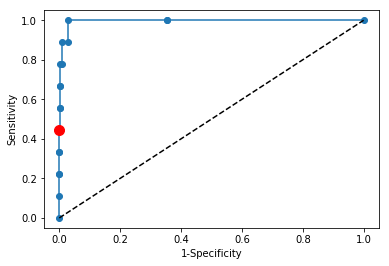

In [19]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [20]:
from sklearn import metrics

roc_auc = metrics.auc(fpr, tpr)
roc_auc # roc curve 아래의 면적 

0.9952968015125236

AUC 값은 1에 가까울수록 성능이 좋다는 것을 뜻하므로, 모델의 성능이 매우 좋다고 생각할 수 있다.

### 3-2) 새로운 cutoff value로 예측하기

In [21]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [22]:
optimal_threshold

0.01337693148657653

최적의 cutoff value 값 = optimal_threshold


판별함수 값이 optimal_threshold 보다 크면 1, 작으면 0으로 분류 

In [23]:
predict_mine = np.where(classifier.predict_proba(X_test) > optimal_threshold, 1, 0)

In [24]:
# 새로운 confusion matrix 
confusion_matrix(y_test, predict_mine[:, 1], labels=[1, 0])

array([[   8,    1],
       [ 197, 6914]], dtype=int64)

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_mine[:, 1]).ravel()
(tn, fp, fn, tp)

(6914, 197, 1, 8)

In [27]:
print("accuracy: ", (tp+tn) / (tp+fn+fp+tn))
print("precision: ", tp / (fp+tp))
print("recall: ", tp / (fn+tp))
print("specificity: ", tn / (fp+tn))
print("f1_score: ", 2*((tp / (fp+tp))*(tp / (fn+tp)))/((tp / (fp+tp))+(tp / (fn+tp))))

accuracy:  0.9721910112359551
precision:  0.03902439024390244
recall:  0.8888888888888888
specificity:  0.9722964421319084
f1_score:  0.07476635514018691


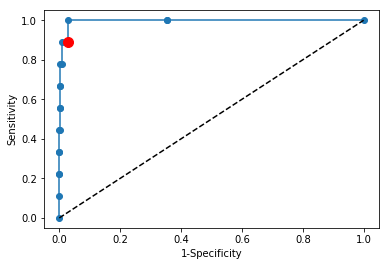

In [28]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-(tn / (fp+tn))], [tp / (fn+tp)], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

* TP (실제=1, 예측=1): 8
* FN (실제=1, 예측=0): 1
* FP (실제=0, 예측=1): 197
* TN (실제=0, 예측=0): 6914

이전 모델보다 평가지표는 매우 낮아졌지만 TP 값이 증가하고, FN값이 감소한 것에서 의의를 찾을 수 있다.

<br>


*사기 탐지 모델의 경우, 사기가 발생했을 때 제대로 캐치하는 것이 중요하다.*  **(= TP)**
* FDS(이상거래탐지시스템)은 카드 부정사용 및 이상징후를 실시간 탐지하여, 이상거래를 신속하게 대응하는 것을 주 목적으로 한다.
* 따라서 실제 사기 행위를 제대로 적발하지 못하는 것이 가장 위험한 행동이 될 수 있다. **(=FN)**
* 추가적으로, FDS에서 정상·비정상 정보의 불균형(비정상 행위 정보(Y=1)의 양이 매우 부족) 문제는 사기를 적발하는 데에 어려움을 준다. 
* FP의 값은 늘어났지만, 이는 철저하게 사기를 예방하는 차원에서 한 번 더 점검한다는 생각으로 본다면 좋을 것 같다.